UTF-8 failed; loaded with Latin-1 encoding.

First few rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column 

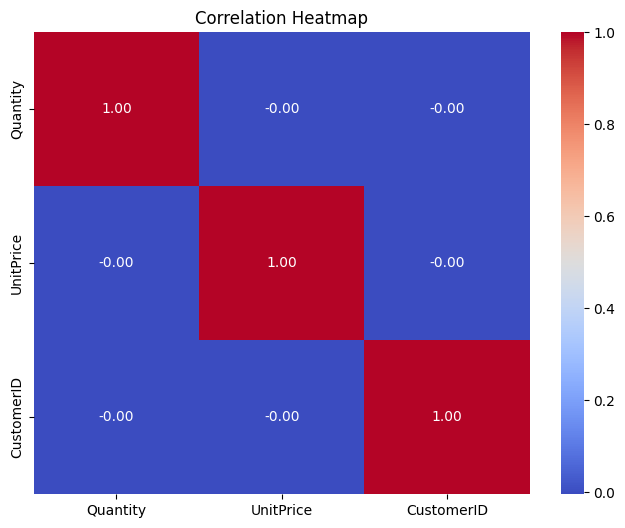


Statistical Summary of Numerical Columns:
            Quantity      UnitPrice     CustomerID
count  536641.000000  536641.000000  401604.000000
mean        9.620029       4.632656   15281.160818
std       219.130156      97.233118    1714.006089
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13939.000000
50%         3.000000       2.080000   15145.000000
75%        10.000000       4.130000   16784.000000
max     80995.000000   38970.000000   18287.000000

Cleaned dataset saved as: C:\Users\DELL\Downloads\archive (2)\cleaned_data.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: I load the dataset, trying UTF-8 first and falling back to Latin-1 if needed
file_path = r"C:\Users\DELL\Downloads\archive (2)\data.csv"
try:
    df = pd.read_csv(file_path)
    print("Loaded with UTF-8 encoding.")
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin-1', engine='python')
    print("UTF-8 failed; loaded with Latin-1 encoding.")

# Step 2: I inspect the first few rows
print("\nFirst few rows of the dataset:")
print(df.head())

# Step 3: I check the DataFrame structure and data types
print("\nDataset Info:")
print(df.info())

# Step 4: I look for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 5: I impute missing values in 'Total_Cost' and 'Total_Items' with their respective means
if 'Total_Cost' in df.columns:
    df['Total_Cost'] = df['Total_Cost'].fillna(df['Total_Cost'].mean())
if 'Total_Items' in df.columns:
    df['Total_Items'] = df['Total_Items'].fillna(df['Total_Items'].mean())
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Step 6: I remove any duplicate rows to avoid redundancy
df.drop_duplicates(inplace=True)
print("\nNumber of duplicate rows after removal:", df.duplicated().sum())

# Step 7: I visualize outliers in 'Total_Items' and 'Total_Cost' using boxplots (if they exist)
for col in ['Total_Items', 'Total_Cost']:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# I calculate the IQR and filter out outliers (only if columns exist)
for col in ['Total_Items', 'Total_Cost']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]

# Step 8: If there's a 'Date' column, I convert it to datetime and extract time features
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Day_of_Week'] = df['Date'].dt.dayofweek

# Step 9: I perform Exploratory Data Analysis (EDA)

# I plot the distribution of 'Total_Cost' and 'Total_Items' if they exist
for col in ['Total_Cost', 'Total_Items']:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

# I generate a correlation heatmap for all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
if not numeric_cols.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

# Step 10: If 'Date' exists, I plot sales trend over time
if 'Date' in df.columns:
    sales_trend = df.groupby('Date')['Total_Items'].sum() if 'Total_Items' in df.columns else df.groupby('Date').size()
    plt.figure(figsize=(10, 4))
    plt.plot(sales_trend)
    plt.title('Sales Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Quantity Sold')
    plt.show()

# Step 11: I print a statistical summary of the numerical columns
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())

# Step 12: I save the cleaned dataset to a new CSV
output_csv_file = r"C:\Users\DELL\Downloads\archive (2)\cleaned_data.csv"
df.to_csv(output_csv_file, index=False)
print(f"\nCleaned dataset saved as: {output_csv_file}")
